# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587SP21 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587SP21issues.json

In [1]:
import os

import warnings
warnings.filterwarnings('ignore')

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [2]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP21issues.json')]

In [3]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [4]:
# Sanity test: print rows in our DataFrame

issues_df
    

,issue_number,created_at,closed_at,labels,State,Author
0,35,2021-03-13,None,"[Category:Bug, DetectionPhase:Design, Originat...",open,SPM587SP21
1,34,2021-03-13,None,"[Category:Inquiry, DetectionPhase:Requirements...",open,SPM587SP21
2,33,2021-03-13,None,"[Category:Bug, DetectionPhase:Design, Originat...",open,SPM587SP21
3,32,2021-03-12,None,"[Category:Enhancement, DetectionPhase:Coding, ...",open,SPM587SP21
4,31,2021-03-12,None,"[Category:Inquiry, DetectionPhase:Design, Orig...",open,SPM587SP21
5,30,2021-03-12,2021-03-16,"[Category:Enhancement, DetectionPhase:Document...",closed,SPM587SP21
6,29,2021-03-12,None,"[Category:Inquiry, DetectionPhase:Requirements...",open,SPM587SP21
7,28,2021-03-12,None,"[Category:Enhancement, DetectionPhase:Field, O...",open,SPM587SP21
8,27,2021-03-11,None,"[Category:Inquiry, DetectionPhase:Documentatio...",open,SPM587SP21
9,26,2021-03-11,None,"[Category:Inquiry, DetectionPhase:Design, Orig...",open,SPM587SP21


In [5]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [6]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,SPM587SP21,open,None,2021-03-13,35,"[Category:Bug, DetectionPhase:Design, Originat...",NaN,NaN,NaN,NaN,NaN
1,SPM587SP21,open,None,2021-03-13,34,"[Category:Inquiry, DetectionPhase:Requirements...",NaN,NaN,NaN,NaN,NaN
2,SPM587SP21,open,None,2021-03-13,33,"[Category:Bug, DetectionPhase:Design, Originat...",NaN,NaN,NaN,NaN,NaN
3,SPM587SP21,open,None,2021-03-12,32,"[Category:Enhancement, DetectionPhase:Coding, ...",NaN,NaN,NaN,NaN,NaN
4,SPM587SP21,open,None,2021-03-12,31,"[Category:Inquiry, DetectionPhase:Design, Orig...",NaN,NaN,NaN,NaN,NaN
5,SPM587SP21,closed,2021-03-16,2021-03-12,30,"[Category:Enhancement, DetectionPhase:Document...",NaN,NaN,NaN,NaN,NaN
6,SPM587SP21,open,None,2021-03-12,29,"[Category:Inquiry, DetectionPhase:Requirements...",NaN,NaN,NaN,NaN,NaN
7,SPM587SP21,open,None,2021-03-12,28,"[Category:Enhancement, DetectionPhase:Field, O...",NaN,NaN,NaN,NaN,NaN
8,SPM587SP21,open,None,2021-03-11,27,"[Category:Inquiry, DetectionPhase:Documentatio...",NaN,NaN,NaN,NaN,NaN
9,SPM587SP21,open,None,2021-03-11,26,"[Category:Inquiry, DetectionPhase:Design, Orig...",NaN,NaN,NaN,NaN,NaN


In [7]:
for i in range(0, len(wrangled_issues_df)):
    if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            if len(label.split(':')) == 2:
                label_name= (label.split(':'))[0]
                label_value= (label.split(':'))[1]
                wrangled_issues_df.loc[i, label_name]=label_value
 

In [8]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,SPM587SP21,open,None,2021-03-13,35,"[Category:Bug, DetectionPhase:Design, Originat...",Requirements,Design,Bug,Major,pendingReview
1,SPM587SP21,open,None,2021-03-13,34,"[Category:Inquiry, DetectionPhase:Requirements...",Design,Requirements,Inquiry,Low,inProgress
2,SPM587SP21,open,None,2021-03-13,33,"[Category:Bug, DetectionPhase:Design, Originat...",Documentation,Design,Bug,Major,pendingReview
3,SPM587SP21,open,None,2021-03-12,32,"[Category:Enhancement, DetectionPhase:Coding, ...",Design,Coding,Enhancement,Medium,inProgress
4,SPM587SP21,open,None,2021-03-12,31,"[Category:Inquiry, DetectionPhase:Design, Orig...",Requirements,Design,Inquiry,Major,Approved
5,SPM587SP21,closed,2021-03-16,2021-03-12,30,"[Category:Enhancement, DetectionPhase:Document...",Testing,Documentation,Enhancement,High,Rejected
6,SPM587SP21,open,None,2021-03-12,29,"[Category:Inquiry, DetectionPhase:Requirements...",Testing,Requirements,Inquiry,Low,inProgress
7,SPM587SP21,open,None,2021-03-12,28,"[Category:Enhancement, DetectionPhase:Field, O...",Design,Field,Enhancement,High,pendingReview
8,SPM587SP21,open,None,2021-03-11,27,"[Category:Inquiry, DetectionPhase:Documentatio...",Design,Documentation,Inquiry,Critical,Completed
9,SPM587SP21,open,None,2021-03-11,26,"[Category:Inquiry, DetectionPhase:Design, Orig...",Coding,Design,Inquiry,Major,Completed


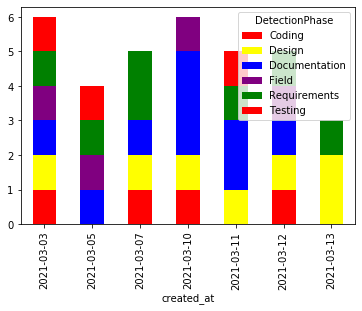

In [9]:
# Plot in Bar Chart the total number of issues created every day for every Detaction Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green'], grid=False)

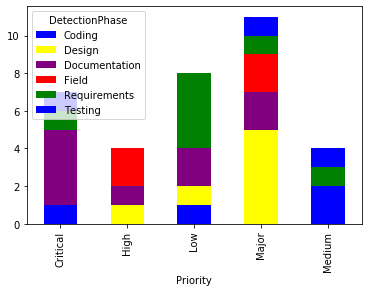

In [10]:
# Plot in Bar Chart the total number of issues created for every Phase based on their priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

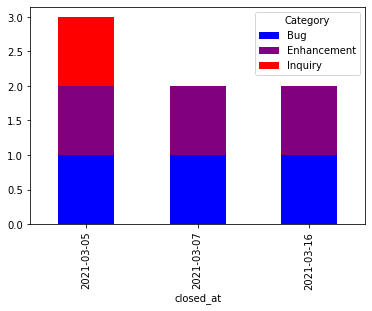

In [11]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green'], grid=False)

#  Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase

In [12]:
# Requirement #1: Add your code here



#  Requirement #2: # Plot in Bar Chart the total number of issues created for every Phase based on their Status

In [13]:
# Requirement #2: Add your code here

